In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd

import random

import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer


Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def prepare_data():
        X = []
        Y = []
        df = pd.read_csv("train.csv")
        mapping = pd.get_dummies(df['target'])
        df.drop('id', axis=1, inplace=True)
	df.drop('target', axis=1, inplace=True)
        df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
        i=0
        while i < len(df['feat_1']):
                inp = []
                out = []
		j=1
		while j <= 9:
                	out.append(mapping[j][i])
                	j=j+1
		j=1
		while j <= 93:
                	inp.append(df["feat_"+ str(j)][i])
			j=j+1
                X.append(inp);
                Y.append(out);
                i=i+1
	g = np.random.permutation(len(X))
	X_final = []
	Y_final = []
	for p in g:
		X_final.append(X[p])
		Y_final.append(Y[p])        
	X_final = np.array(X_final)
	Y_final = np.array(Y_final)
	return X_final,Y_final


<IPython.core.display.Javascript object>


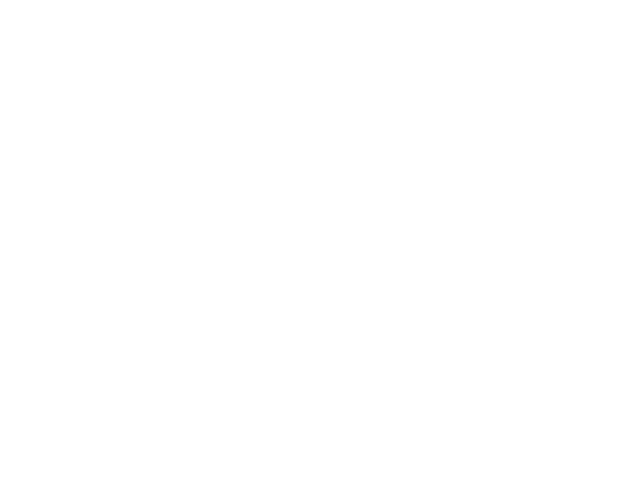

<IPython.core.display.Javascript object>


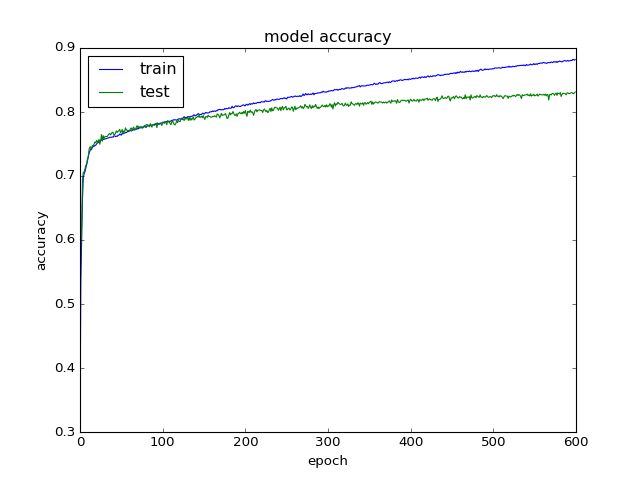

<IPython.core.display.Javascript object>


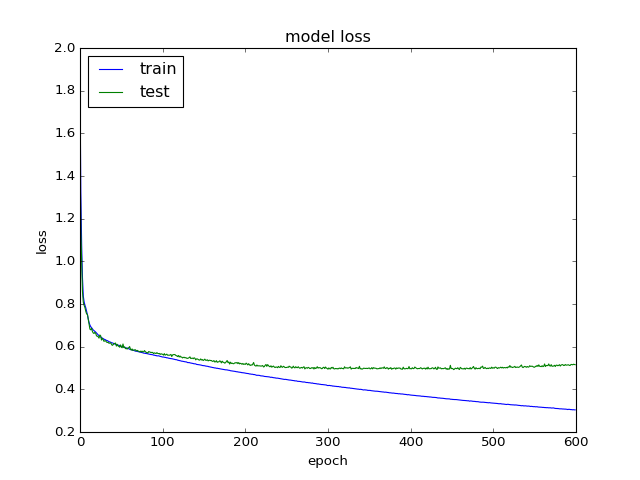

<IPython.core.display.Javascript object>


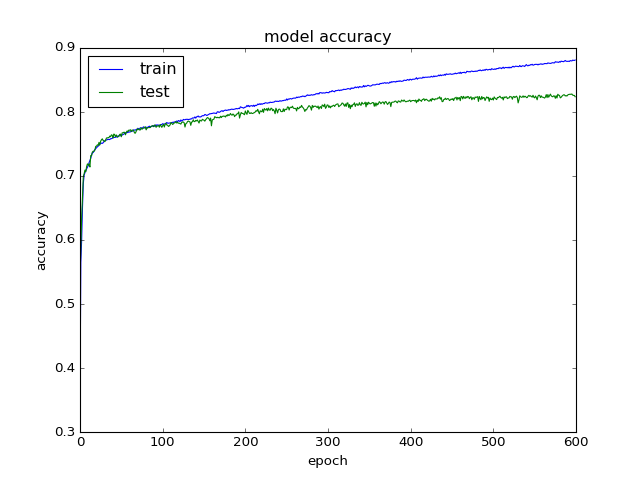

<IPython.core.display.Javascript object>


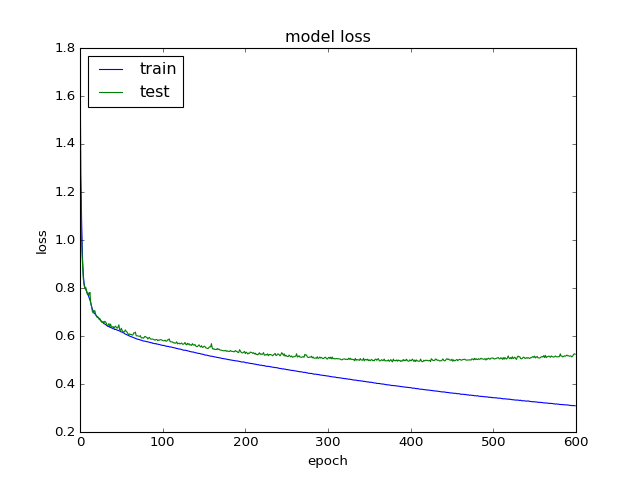

<IPython.core.display.Javascript object>


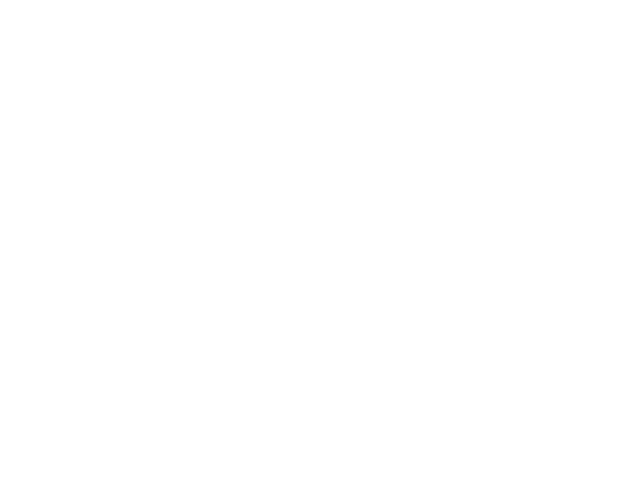

/usr/local/lib/python2.7/dist-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(93, activation="sigmoid", kernel_initializer="uniform", input_dim=93)`
  '` call to the Keras 2 API: ' + signature)
/usr/local/lib/python2.7/dist-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, activation="tanh", kernel_initializer="uniform")`
  '` call to the Keras 2 API: ' + signature)
/usr/local/lib/python2.7/dist-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="sigmoid", kernel_initializer="uniform")`
  '` call to the Keras 2 API: ' + signature)
/usr/local/lib/python2.7/dist-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="softmax", kernel_initializer="uniform")`
  '` call to the Keras 2 API: ' + signature)
/usr/local/lib/python2.7/dist-packages/ker

Train on 49504 samples, validate on 12376 samples
Epoch 1/600
49504/49504 [==============================] - 1s - loss: 1.8183 - acc: 0.3255 - val_loss: 1.5006 - val_acc: 0.4640
Epoch 2/600
49504/49504 [==============================] - 1s - loss: 1.2960 - acc: 0.5544 - val_loss: 1.1494 - val_acc: 0.5876
Epoch 3/600
49504/49504 [==============================] - 1s - loss: 1.0823 - acc: 0.5971 - val_loss: 0.9772 - val_acc: 0.6395
Epoch 4/600
49504/49504 [==============================] - 1s - loss: 0.9168 - acc: 0.6633 - val_loss: 0.8569 - val_acc: 0.6890
Epoch 5/600
49504/49504 [==============================] - 1s - loss: 0.8422 - acc: 0.6960 - val_loss: 0.8158 - val_acc: 0.7027
Epoch 6/600
49504/49504 [==============================] - 1s - loss: 0.8147 - acc: 0.7034 - val_loss: 0.7979 - val_acc: 0.7060
Epoch 7/600
49504/49504 [==============================] - 1s - loss: 0.8020 - acc: 0.7057 - val_loss: 0.7871 - val_acc: 0.7094
Epoch 8/600
49504/49504 [=============================

<IPython.core.display.Javascript object>


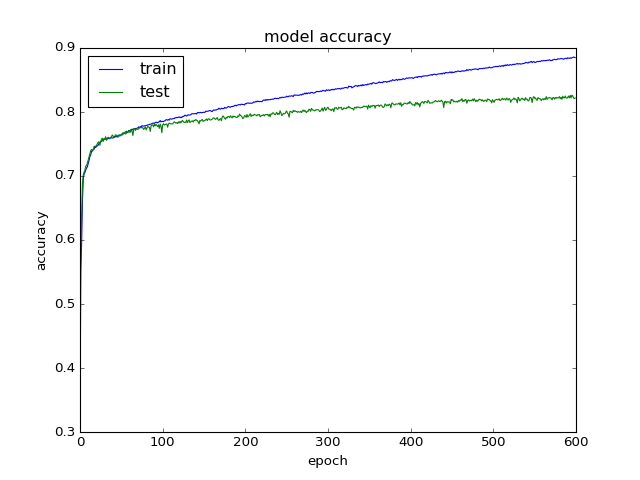

Train on 49504 samples, validate on 12376 samples
Epoch 1/600
49504/49504 [==============================] - 4s - loss: 1.8276 - acc: 0.3068 - val_loss: 1.5323 - val_acc: 0.4458
Epoch 2/600
49504/49504 [==============================] - 3s - loss: 1.3245 - acc: 0.5368 - val_loss: 1.1376 - val_acc: 0.5898
Epoch 3/600
49504/49504 [==============================] - 4s - loss: 1.0767 - acc: 0.5981 - val_loss: 0.9965 - val_acc: 0.6242
Epoch 4/600
49504/49504 [==============================] - 3s - loss: 0.9217 - acc: 0.6642 - val_loss: 0.8572 - val_acc: 0.6937
Epoch 5/600
49504/49504 [==============================] - 2s - loss: 0.8370 - acc: 0.6972 - val_loss: 0.8083 - val_acc: 0.7056
Epoch 6/600
49504/49504 [==============================] - 4s - loss: 0.8097 - acc: 0.7039 - val_loss: 0.7936 - val_acc: 0.7063
Epoch 7/600
49504/49504 [==============================] - 2s - loss: 0.7943 - acc: 0.7067 - val_loss: 0.7829 - val_acc: 0.7108
Epoch 8/600
49504/49504 [=============================

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

X,Y = prepare_data()
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
sss.get_n_splits(X, Y)
j=0
fig = [ plt.figure() for x in range(6)]
    # create model
k=0
for train_index, test_index in sss.split(X, Y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = Y[train_index], Y[test_index]
	X_train = np.array(X_train, dtype=np.float32)
	y_train = np.array(y_train, dtype=np.float32)
	j=j+1

	model = Sequential()
	model.add(Dense(93, input_dim=93, init='uniform', activation='sigmoid'))
	model.add(Dense(40, init='uniform', activation='tanh'))
	model.add(Dense(30, init='uniform', activation='sigmoid'))
	model.add(Dense(9, init='uniform', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	history = model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=600, batch_size=56)
	# evaluate the model
	scores = model.evaluate(X, Y)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	fig[k] = plt.figure(k)
	plt.plot(history.history['acc'])
	plt.plot(history.history['val_acc'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	plt.show()
	fig[k].savefig("otto_accuracy_"+str(j))
	k=k+1
	fig[k] = plt.figure(k)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	plt.show()
	fig[k].savefig("otto_loss_"+str(j))
	k=k+1



In [4]:

k=0
while k < len(fig):
    plt.figure(k)
    plt.show()
    k=k+1
    